In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath("../../"))
from pipeoptz import Pipeline, Node, NodeWhile

In [ ]:
def add(x, y):
    print(f"add({x}, {y})")
    return x + y

def cond_func(loop_var, y):
    print(f"{loop_var=}, {y=}, ")
    return loop_var <= y

In [ ]:
pipeline = Pipeline("For Loop Test")
while_pipeline = Pipeline("While Loop")

pipeline.add_node(Node("A", add), predecessors={"x":"run_params:x","y":"run_params:y"})
while_pipeline.add_node(Node("B", add, fixed_params={"x":1}), predecessors={"y":"run_params:loop_var"})
pipeline.add_node(NodeWhile("While Test", cond_func, while_pipeline, fixed_params={"max_iterations":10, "y":5}), predecessors={"loop_var":"A"})

NameError: name 'cond_func' is not defined

In [ ]:
print("Ordre topologique:", pipeline.static_order())

Ordre topologique: ['A', 'While Test']


In [ ]:
outputs = pipeline.run({"x":-3, "y":0}, debug=True)
print("Résultats du pipeline:", outputs[1][outputs[0]], "\n" , outputs, "\n")

Executing node: A
add(-3, 0)
Executing node: While Test
Executing node: While Test iteration 1
Executing node: B
add(1, -3)
Executing node: While Test iteration 2
Executing node: B
add(1, -2)
Executing node: While Test iteration 3
Executing node: B
add(1, -1)
Executing node: While Test iteration 4
Executing node: B
add(1, 0)
Executing node: While Test iteration 5
Executing node: B
add(1, 1)
Executing node: While Test iteration 6
Executing node: B
add(1, 2)
Executing node: While Test iteration 7
Executing node: B
add(1, 3)
Executing node: While Test iteration 8
Executing node: B
add(1, 4)
Résultats du pipeline: 5 
 ('While Test', {'A': -3, 'While Test': 5}, (0.001088857650756836, {'A': 0.00058746337890625, 'While Test': 0.0005013942718505859})) 



In [ ]:
pipeline.to_json("pipeline_example_for.json")
print("Fichier .json générés.")

Fichier .json générés.


In [ ]:
print("\nChargement du pipeline depuis JSON et exécution:")
loaded_pipeline = Pipeline.from_json("pipeline_example_for.json")
loaded_outputs = loaded_pipeline.run({"x":5, "y":1})
print("Résultats du pipeline chargé en JSON:", loaded_outputs)


Chargement du pipeline depuis JSON et exécution:
add(5, 1)
Résultats du pipeline chargé en JSON: ('While Test', {'A': 6, 'While Test': 6}, (9.679794311523438e-05, {'A': 8.225440979003906e-05, 'While Test': 1.4543533325195312e-05}))


Fichier .dot et .png généré.


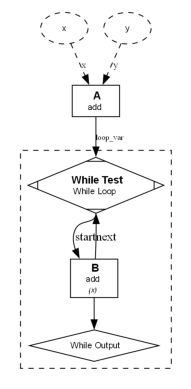

In [ ]:
pipeline.to_dot("pipeline_example_for.dot", generate_png=True)
print("Fichier .dot et .png généré.")
plt.axis('off')
plt.imshow(Image.open("pipeline_example_for.png"))